In [1]:
import os
from mot_postgres.database_creator import DatabaseCreator
from mot_postgres.database_creator import DatabaseProps
import numpy as np
from copy import deepcopy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


dp = DatabaseProps()
dp.port = 8888
os.environ["PGPASSWORD"] = 'neor123'
dbc = DatabaseCreator(dp)



In [17]:
import pandas as pd
scenario = 'MOT20-03'
run_id = 2
df = dbc.get_distances_by_scenario(run_id, scenario)

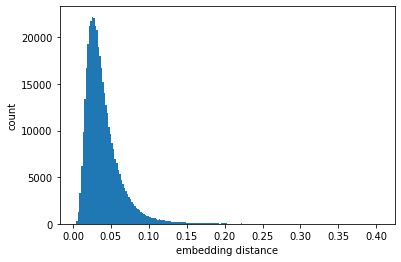

In [22]:
a = plt.hist(df['embedding_distance'], bins=200)
plt.xlabel('embedding distance')
plt.ylabel('count')
plt.savefig(f'latex_files/assosiaction/images/{scenario} embedding_distance run {run_id}.png')

In [37]:
em = df.dropna()['embedding_distance']
print(f'mean = {em.mean()}')
print(f'median = {em.median()}')
print(f'std = {em.std()}')
print(f'95 precentile = {np.percentile(em.values, 95)}')


mean = 0.0398927734180209
median = 0.0338233385
std = 0.025180591954551336
95 precentile = 0.08420926417999987


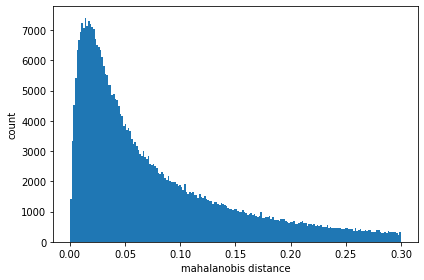

In [40]:
md = df.loc[df['mahalanobis_distance'] <0.3]
a = plt.hist(md['mahalanobis_distance'], bins=200)
plt.xlabel('mahalanobis distance')
plt.ylabel('count')
plt.tight_layout()
plt.savefig(f'latex_files/assosiaction/images/{scenario} clipped mahalanobis_distance run {run_id}.png')

In [41]:
em = df.dropna()['mahalanobis_distance']
print(f'mean = {em.mean()}')
print(f'median = {em.median()}')
print(f'std = {em.std()}')
print(f'95 precentile = {np.percentile(em.values, 95)}')


mean = 0.13618196267040014
median = 0.059397468
std = 0.3161580317022378
95 precentile = 0.4550272566599984


In [15]:
with open('latex.txt', 'w') as f:
    f.write(df.loc[df['frame_id'] == 2].head().to_latex())

In [8]:
df['mahalanobis_distance'].values

array([       nan,        nan,        nan, ..., 0.01700834, 0.01512291,
       0.01512291])

/home/neor/Thesis/database/mot_postgres/database_creator.py:411: SAWarning: Coercing Subquery object into a select() for use in IN(); please pass a select() construct explicitly
  Detections.height).label('diff_height')).filter(GroundTruth.scenario_id.in_(subquery)).order_by(GroundTruth.frame_id). \


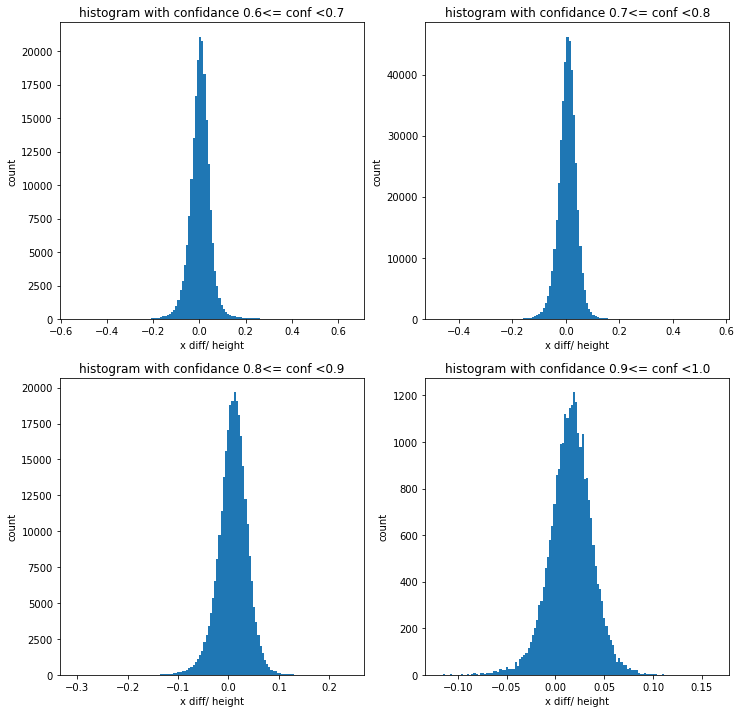

In [35]:
stds2

[0.03933105352938163,
 0.03124356552353202,
 0.023861863746522962,
 0.018430793452187143]

In [34]:
means2

[0.011295180331802384,
 0.013480943517631197,
 0.01581182021877691,
 0.01583851831910313]

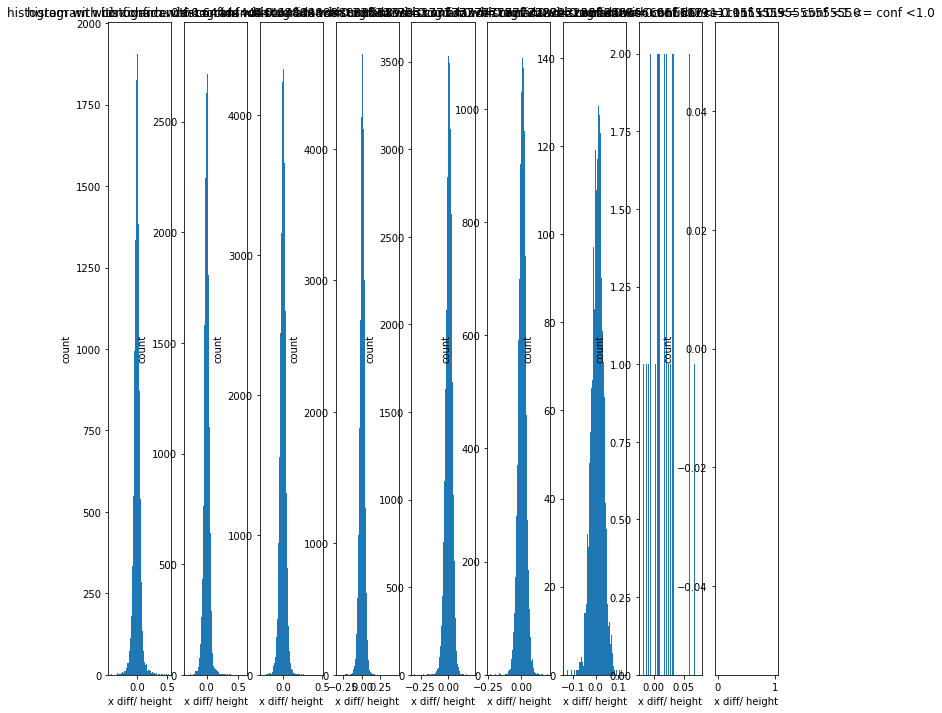

In [20]:
stds = []
n = 10
fig, axes = plt.subplots(1,n -1, figsize = (12,12))
means = []

confidances = np.linspace(0.6, 1, n)

for idx, confidance in enumerate(confidances):
    if idx == n - 1:
        break
    df_C = df.loc[(df['confidance'] >= confidance) & (df['confidance'] < confidances[idx + 1])]
    axes[idx].set_title(f'histogram with confidance {confidance}<= conf <{round(confidances[idx + 1], 1)}')
    ratio = df_C['diff_min_x']/df_C['gt_height']
    axes[idx].hist(ratio , bins=128)
    axes[idx].set_xlabel("x diff/ height")
    stds.append(ratio.std())
    means.append(ratio.mean())
    axes[idx].set_ylabel("count")
plt.savefig(f'/home/neor/Thesis/database/latex_files/MOT20-03_confidance_histogram.png')

In [21]:
df_C

,frame_id,target_id,detection_id,confidance,gt_min_x,dt_min_x,gt_min_y,dt_min_y,gt_width,dt_width,gt_height,dt_height,iou,diff_min_x,diff_min_y,diff_width,diff_height


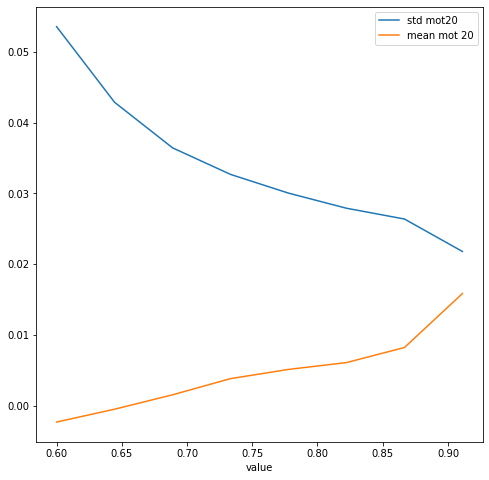

In [32]:
plt.figure(figsize=(8,8))
plt.plot(confidances[:-2],stds[:-1], label='std mot20' )
plt.plot(confidances[:-2],means[:-1], label='mean mot 20' )
plt.xlabel('confidance')
plt.xlabel('value')
plt.legend()
# plt.savefig(f'/home/neor/Thesis/database/latex_files/graph_conf-stats.png')

In [25]:
x1 = 0.6
y1 = stds[0]

x2 = 0.9
y2 = stds[-2]

a = (y2 - y1) / (x2 - x1)
b = y1 - a * x1

print('slope: ', a)
print('intercept: ', b)

slope:  -0.10591047397888595
intercept:  0.11709626320378874


In [31]:
len(confidances)

10

In [9]:
confidances = np.linspace(0.6, 1, 10)


In [23]:
stds

[0.05354997881645717,
 0.04286324365235169,
 0.03642398394276934,
 0.03266940677253279,
 0.030025087288871124,
 0.027887654451654958,
 0.02636335485649448,
 0.021776836622791382,
 nan]

In [13]:
confidance[idx + 1]

IndexError: invalid index to scalar variable.

In [16]:
idx

0